In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def example1(x):
    return -x

def example2(x):
    return x

def example3(x):
    return np.array([-x[1], x[0]])

def example4(x):
    return np.array([-x[1]-x[2],
            x[0]+0.2*x[1],
            0.2 + x[2]*(x[0]-5.7)])

In [36]:
def example1_error(t, x0, xt):
    return np.abs(x0*np.exp(-t) - xt)

def example2_error(t, x0, xt):
    return np.abs(x0*np.exp(t) - xt)

def example3_error(t, x0, xt):
    return np.abs(x0[0]*np.sin(t) + x0[1]*np.cos(t) - xt)

In [37]:
def Euler(func, x0, t0, T, h, history, func_error = None):
    xs = x0
    while t0 < T:
        x1=x0+h*func(x0)
        t0+=h
        if(func_error!=None):
            history.append([t0, x1, func_error(t0, xs, x1)])
        else:
            history.append([t0, x1])
        x0 = x1
    return x0


In [38]:
def RK4(func, x0, t0, T, h, history, func_error = None):
    xs = x0
    while t0 < T:
        k1=func(x0)
        k2=func(x0+h/2*k1)
        k3=func(x0+h/2*k2)
        k4=func(x0+h*k3)
        x1=x0+h/6*(k1+2*k2+2*k3+k4)
        t0+=h
        if(func_error!=None):
            history.append([t0, x1, func_error(t0, xs, x1)])
        else:
            history.append([t0, x1])
        x0 = x1
    return x0


C:\Users\ivlev\AppData\Local\Temp\ipykernel_31360\3125899402.py:21: RuntimeWarning: divide by zero encountered in log10
  axis[1].plot([row[0] for row in history2], np.log10([row[2] for row in history2]), label = "РК4 h = " + str(h))#


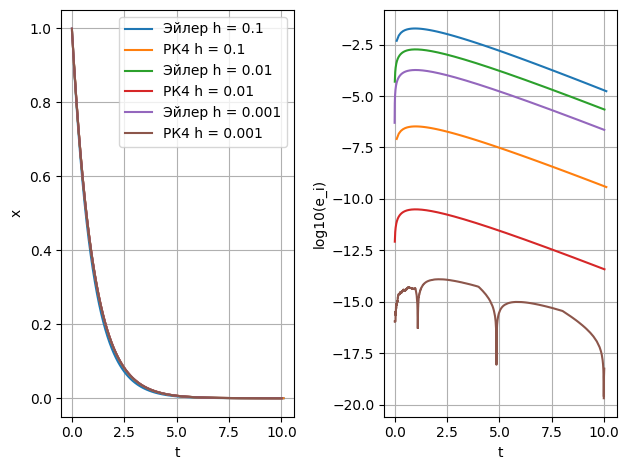

In [39]:
t0 = 0
T = 10
x0 = 1

figure, axis = plt.subplots(1, 2)
axis[0].set_xlabel("t")
axis[1].set_xlabel("t")
axis[0].set_ylabel("x")
axis[1].set_ylabel("log10(e_i)")
axis[0].grid(True)
axis[1].grid(True)

for h in [0.1, 0.01, 0.001]:
    history = []
    history2 = []
    Euler(example1, x0, t0, T, h, history, example1_error)
    RK4(example1, x0, t0, T, h, history2, example1_error)
    axis[0].plot([row[0] for row in history], [row[1] for row in history], label = "Эйлер h = " + str(h))
    axis[1].plot([row[0] for row in history], np.log10([row[2] for row in history]), label = "Эйлер h = " + str(h))#
    axis[0].plot([row[0] for row in history2], [row[1] for row in history2], label = "РК4 h = " + str(h))
    axis[1].plot([row[0] for row in history2], np.log10([row[2] for row in history2]), label = "РК4 h = " + str(h))#

plt.tight_layout()
axis[0].legend()
plt.show()

C:\Users\ivlev\AppData\Local\Temp\ipykernel_31360\981722787.py:21: RuntimeWarning: divide by zero encountered in log10
  axis[1].plot([row[0] for row in history2], np.log10([row[2] for row in history2]), label = "РК4 h = " + str(h))#


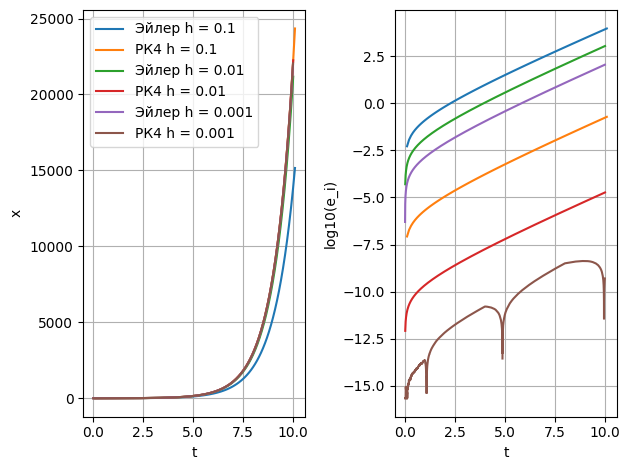

In [40]:
t0 = 0
T = 10
x0 = 1

figure, axis = plt.subplots(1, 2)
axis[0].set_xlabel("t")
axis[1].set_xlabel("t")
axis[0].set_ylabel("x")
axis[1].set_ylabel("log10(e_i)")
axis[0].grid(True)
axis[1].grid(True)

for h in [0.1, 0.01, 0.001]:
    history = []
    history2 = []
    Euler(example2, x0, t0, T, h, history, example2_error)
    RK4(example2, x0, t0, T, h, history2, example2_error)
    axis[0].plot([row[0] for row in history], [row[1] for row in history], label = "Эйлер h = " + str(h))
    axis[1].plot([row[0] for row in history], np.log10([row[2] for row in history]), label = "Эйлер h = " + str(h))#
    axis[0].plot([row[0] for row in history2], [row[1] for row in history2], label = "РК4 h = " + str(h))
    axis[1].plot([row[0] for row in history2], np.log10([row[2] for row in history2]), label = "РК4 h = " + str(h))#

plt.tight_layout()
axis[0].legend()
plt.show()

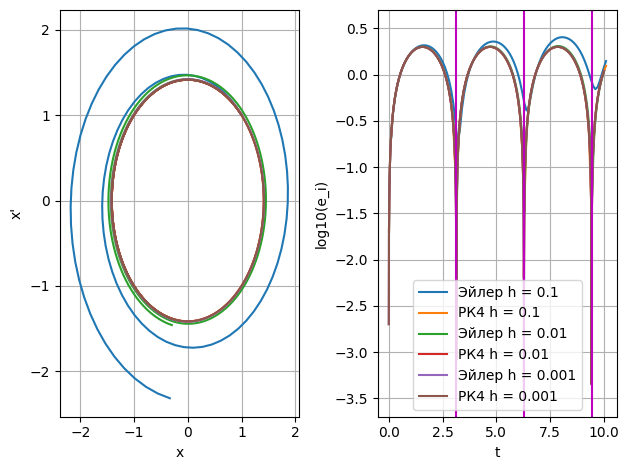

In [49]:
t0 = 0
T = 10
x0 = np.array([1., 1.])

figure, axis = plt.subplots(1, 2)
axis[0].set_xlabel("x")
axis[1].set_xlabel("t")
axis[0].set_ylabel("x'")
axis[1].set_ylabel("log10(e_i)")
axis[0].grid(True)
axis[1].grid(True)

for h in [0.1, 0.01, 0.001]:
    history = []
    history2 = []
    Euler(example3, x0, t0, T, h, history, example3_error)
    RK4(example3, x0, t0, T, h, history2, example3_error)
    axis[0].plot([row[1][0] for row in history], [row[1][1] for row in history], label = "Эйлер h = " + str(h))
    axis[1].plot([row[0] for row in history], np.log10([np.sqrt(row[2][0]**2 + row[2][1]**2) for row in history]), label = "Эйлер h = " + str(h))#
    axis[0].plot([row[1][0] for row in history2], [row[1][1] for row in history2], label = "РК4 h = " + str(h))
    axis[1].plot([row[0] for row in history2], np.log10([np.sqrt(row[2][0]**2 + row[2][1]**2) for row in history2]), label = "РК4 h = " + str(h))#

axis[1].axline((np.pi,-3.5), (np.pi,0.5), color = 'm')
axis[1].axline((2*np.pi,-3.5), (2*np.pi,0.5), color = 'm')
axis[1].axline((3*np.pi,-3.5), (3*np.pi,0.5), color = 'm')
plt.tight_layout()
plt.legend()
plt.show()

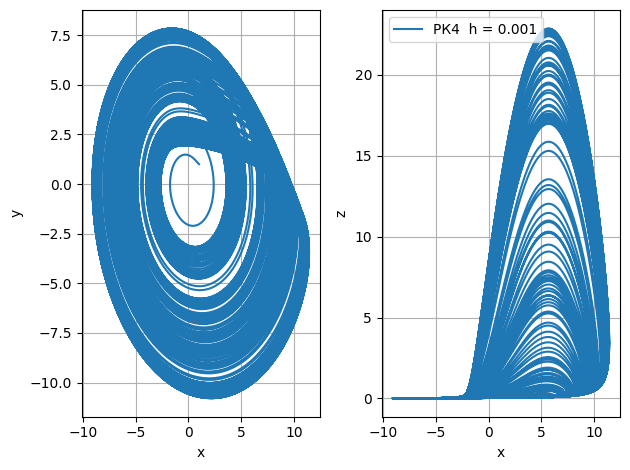

In [53]:
t0 = 0
T = 1000
x0 = np.array([1., 1., 1.])

figure, axis = plt.subplots(1, 2)
axis[0].set_xlabel("x")
axis[1].set_xlabel("x")
axis[0].set_ylabel("y")
axis[1].set_ylabel("z")
axis[0].grid(True)
axis[1].grid(True)


h_list = [0.001]
for i in range(len(h_list)):
    h = h_list[i]
    history = []
    history2 = []
    Euler(example4, x0, t0, T, h, history)
    RK4(example4, x0, t0, T, h, history2)
    if (h == 0.001):
        axis[0].plot([row[1][0] for row in history2], [row[1][1] for row in history2], label = "РК4 h = " + str(h))
        axis[1].plot([row[1][0] for row in history2], [row[1][2] for row in history2], label = "РК4  h = " + str(h))

plt.tight_layout()
plt.legend()
plt.show()

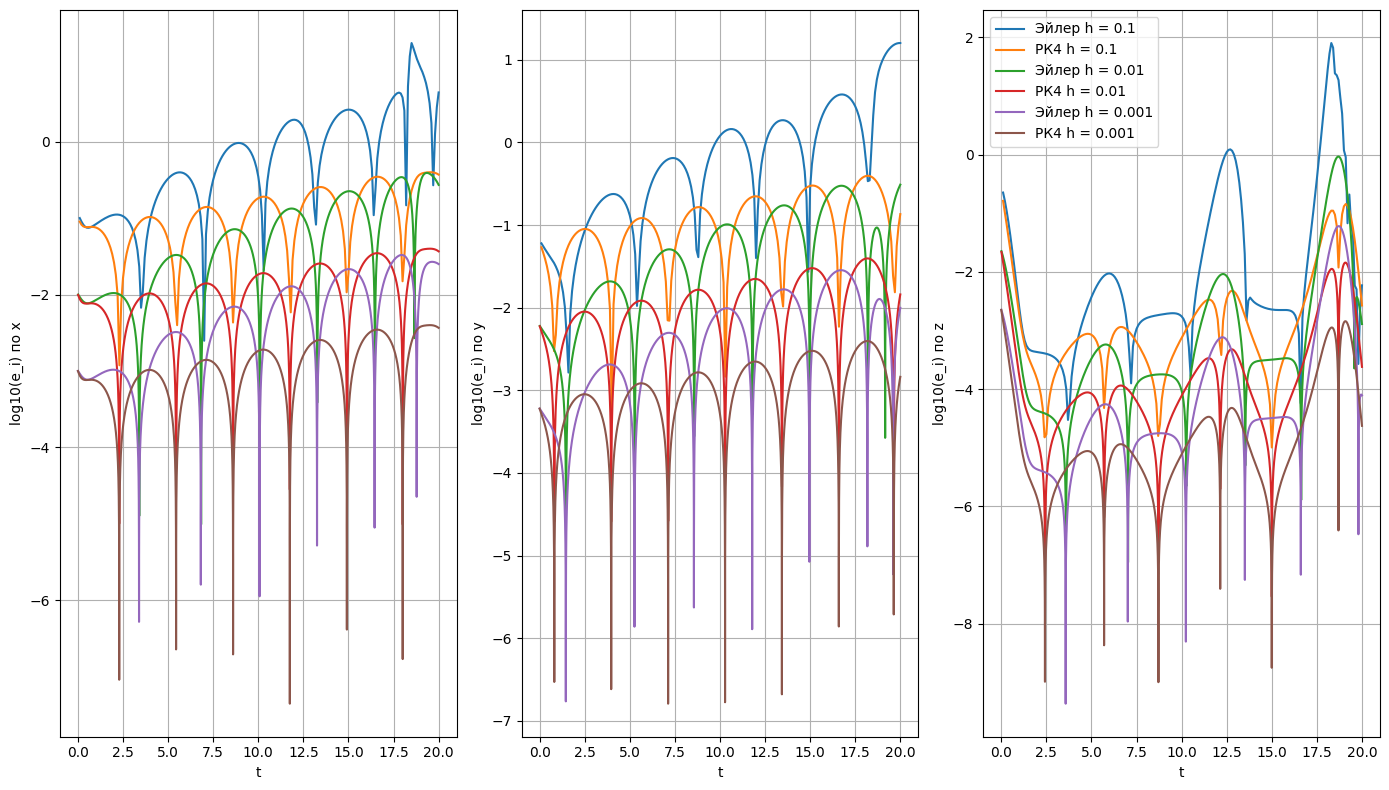

In [43]:
t0 = 0
T = 20
x0 = np.array([1., 1., 1.])

figure, axis = plt.subplots(1, 3)
figure.set_figwidth(14)
figure.set_figheight(8)
axis[0].set_xlabel("t")
axis[1].set_xlabel("t")
axis[2].set_xlabel("t")
axis[0].set_ylabel("log10(e_i) по x")
axis[1].set_ylabel("log10(e_i) по y")
axis[2].set_ylabel("log10(e_i) по z")
axis[0].grid(True)
axis[1].grid(True)
axis[2].grid(True)


h_list = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
for i in range(len(h_list)):
    h = h_list[i]
    if(i % 2 == 0):
        history = []
        history2 = []
        Euler(example4, x0, t0, T, h, history)
        RK4(example4, x0, t0, T, h, history2)
    else:
        history_2 = []
        history2_2 = []
        Euler(example4, x0, t0, T+h, h, history_2)
        RK4(example4, x0, t0, T+h, h, history2_2)
        axis[0].plot([row[0] for row in history], np.log10([np.abs(history[i][1][0]-history_2[2*i][1][0]) for i in range(len(history))]), label = "Эйлер h = " + str(h*2))
        axis[1].plot([row[0] for row in history], np.log10([np.abs(history[i][1][1]-history_2[2*i][1][1]) for i in range(len(history))]), label = "Эйлер h = " + str(h*2))
        axis[2].plot([row[0] for row in history], np.log10([np.abs(history[i][1][2]-history_2[2*i][1][2]) for i in range(len(history))]), label = "Эйлер h = " + str(h*2))
        axis[0].plot([row[0] for row in history2], np.log10([np.abs(history2[i][1][0]-history2_2[2*i][1][0]) for i in range(len(history2))]), label = "РК4 h = " + str(h*2))
        axis[1].plot([row[0] for row in history2], np.log10([np.abs(history2[i][1][1]-history2_2[2*i][1][1]) for i in range(len(history2))]), label = "РК4 h = " + str(h*2))
        axis[2].plot([row[0] for row in history2], np.log10([np.abs(history2[i][1][2]-history2_2[2*i][1][2]) for i in range(len(history2))]), label = "РК4 h = " + str(h*2))

plt.tight_layout()
plt.legend()
plt.show()